<a href="https://colab.research.google.com/github/alebas-fr/3DETECH-Computer-Vision/blob/main/TP2_Computer_Vision_Feature_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since corners are interesting features of an image. Feature detection algorithms started with detecting corners. There are number of techniques in OpenCV to detect the features. Here are the most famous feature detectors:

*   Haris corner detection
*   Shi-Tomasi corner detection
*   SIFT (Scale-Invariant Feature Transform)
*   SURF (Speeded-Up Robust Features)
*   FAST algorithm for corner detection
*   ORB (Oriented FAST and Rotated Brief)


SIFT, SURF are patented and are not available free for commercial use. It requires opencv-contrib to be installed in order to use them


In [ ]:
!pip uninstall opencv-python -y
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 27 kB/s 
     |████████████████████████████████| 15.7 MB 195 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imgaug 0.2.9 requires opencv-python, which is not installed.
dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
albumentations 0.1.12 requires opencv-python, which is not ins

**Haris corner detection**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!unzip -u "/content/drive/My Drive/Data.zip" 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/My Drive/Data.zip


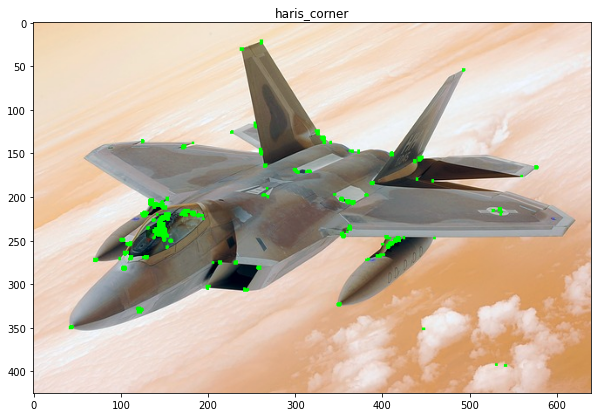

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt



img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

dst = cv2.cornerHarris(gray_img, blockSize=3, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 255, 0]

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("haris_corner")
plt.show()


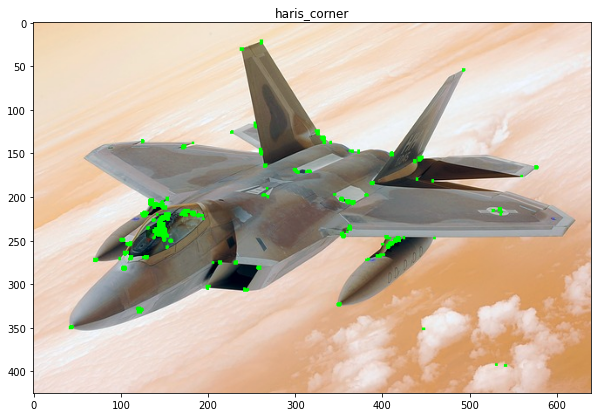

In [ ]:

img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

dst = cv2.cornerHarris(gray_img, blockSize=3, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 255, 0]

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("haris_corner")
plt.show()


**Shi-Tomasi corner detection**: It is also called Good Features. It's an evolution of Haris corner detector which came up with a different scoring function than the one used in Haris to find N strongest corners from an image.

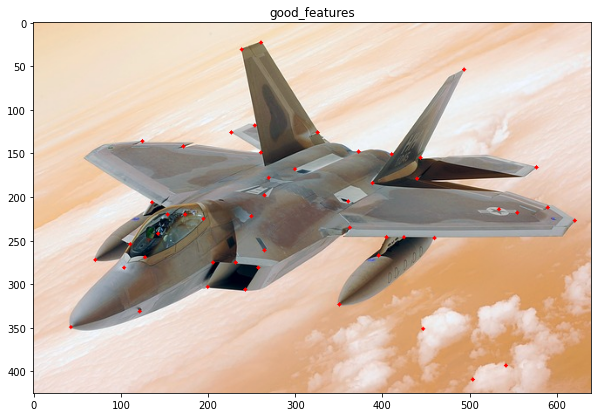

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50,qualityLevel=0.02,minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (x, y), 2, (255, 0, 0), -1)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("good_features")
plt.show()

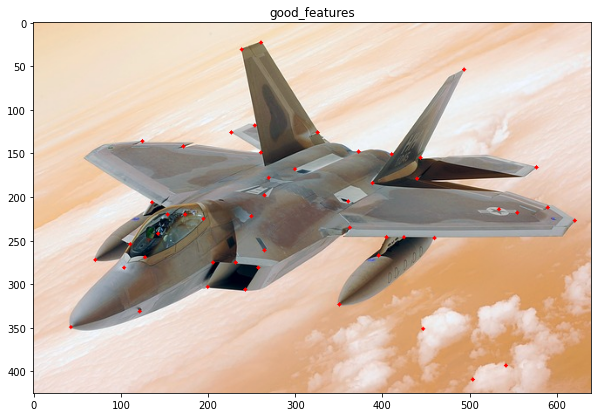

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50,qualityLevel=0.02,minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (x, y), 2, (255, 0, 0), -1)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("good_features")
plt.show()

The above two techniques Haris Corner and Shi-Tomasi are rotation invariant that means even if the corners are rotated we will be able to detect the corners exactly. However they are scale variant.

**SIFT (Scale-Invariant Feature Transform)**: SIFT is both rotation and  scale invariant. It provides key points and keypoint descriptors where keypoint descriptor describes the keypoint at a selected scale and rotation with image gradients. We display SIFT  with circles depicting the key points/features, where size of the circle represents the strength of the key point and the line inside the circle denotes the orientation of the key point.

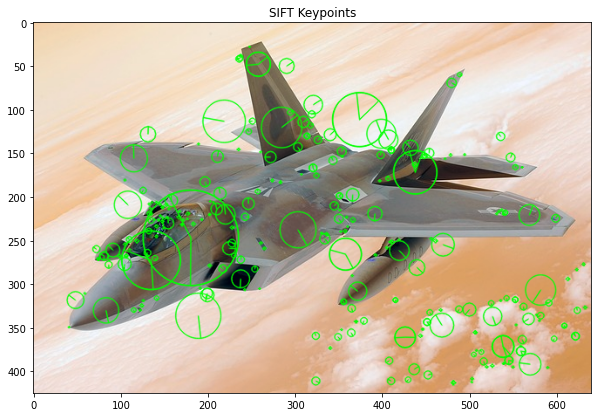

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0),  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(kp_img)
plt.title("SIFT Keypoints")
plt.show()

**SURF (Speeded-Up Robust Features)**:
SURF was introduced to have all the advantages of SIFT with reduced processing time.

In [ ]:

img = cv2.imread('Data/plane.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

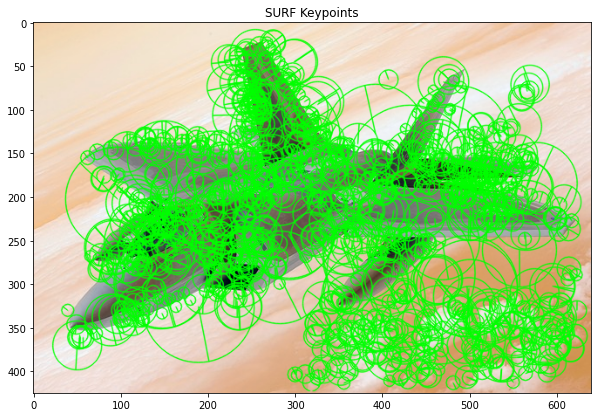

In [ ]:
surf = cv2.xfeatures2d.SURF_create()
kp, des = surf.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(kp_img)
plt.title("SURF Keypoints")
plt.show()

**FAST algorithm for corner detection**:
FAST algorithm was introduced with reduced processing time. However FAST gives us only the key points and we may need to compute descriptors with other algorithms like SIFT and SURF

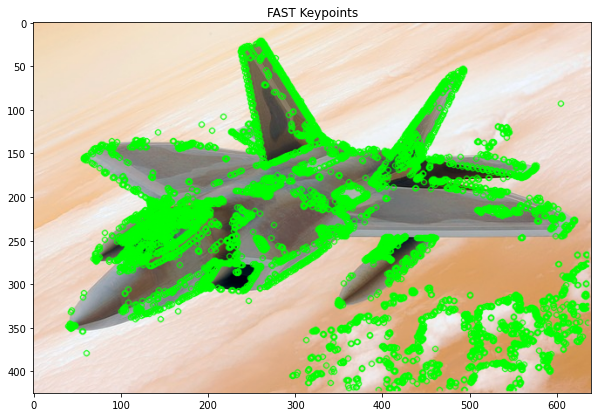

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

kp = fast.detect(gray_img, None)
kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))
figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(kp_img)
plt.title("FAST Keypoints")
plt.show()

**ORB**: 
ORB is an open source detector alternative to SIFT and SURF. It uses FAST and BRIEF techniques to detect the key points and compute the image descriptors respectively.

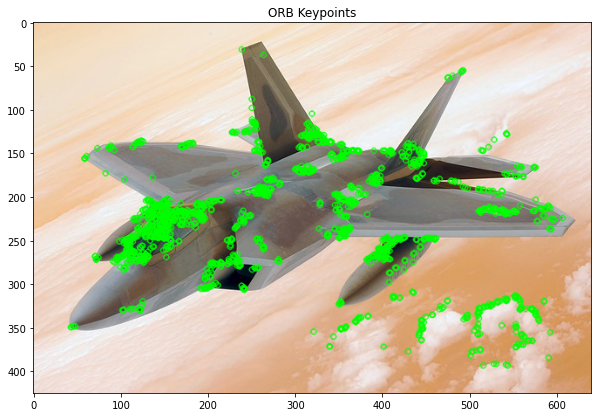

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Data/plane.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_img, None)

kp_img = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(kp_img)
plt.title("ORB Keypoints")
plt.show()

**Feature matching**: 
Feature matching between images can be done with:


*   Brute-Force (BF) Matcher: it matches the descriptor of a feature from one image with all other features of another image and returns the match based on the distance. It is slow since it checks match with all the features
*   Flannmatcher: Fast Library for Approximate Nearest Neighbors (FLANN) is optimised to find the matches with search even with large datasets hence its fast when compared to Brute-Force matcher.


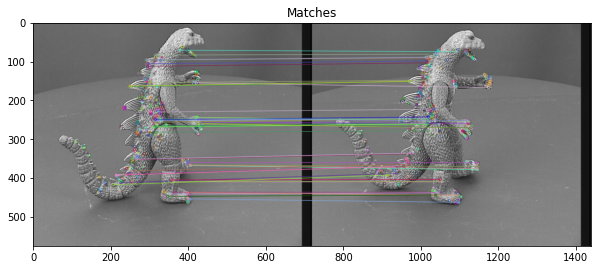

In [ ]:
#Brute-Force (BF) Matcher:

import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('Data/viff.001.ppm', 0)
img2 = cv2.imread('Data/viff.003.ppm', 0)

orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(match_img)
plt.title("Matches")
plt.show()